In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./sample_data_for_analysis.csv')
data

,Date of Sale,Product Category,Region,Price,Quantity,Sales,Customer Feedback,Promotion Applied
0,2023-11-24,Toys,West,380.79,11,4188.69,Value for money,True
1,2023-02-27,Clothing,North,951.21,17,16170.57,Worth the price,True
2,2023-01-13,Grocery,North,734.67,8,5877.36,Value for money,True
3,2023-05-21,Toys,North,602.67,4,2410.68,Excellent quality,True
4,2023-05-06,Toys,South,164.46,6,986.76,Highly recommend,False
...,...,...,...,...,...,...,...,...
195,2023-09-30,Grocery,North,355.72,4,1422.88,Excellent quality,True
196,2023-03-06,Clothing,West,728.70,18,13116.60,Value for money,True
197,2023-03-07,Grocery,North,898.14,13,11675.82,Value for money,True
198,2023-12-04,Clothing,North,888.22,11,9770.42,Not as expected,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date of Sale       200 non-null    object 
 1   Product Category   200 non-null    object 
 2   Region             200 non-null    object 
 3   Price              200 non-null    float64
 4   Quantity           200 non-null    int64  
 5   Sales              200 non-null    float64
 6   Customer Feedback  200 non-null    object 
 7   Promotion Applied  200 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 11.3+ KB


In [9]:
data.describe()

,Price,Quantity,Sales
count,200.000000,200.000000,200.000000
mean,489.166200,9.570000,5035.180800
std,291.942465,5.925424,4719.953848
min,15.470000,1.000000,41.110000
25%,236.297500,4.000000,1078.860000
50%,499.545000,10.000000,3237.480000
75%,759.295000,15.000000,8335.800000
max,987.020000,19.000000,18353.620000


# 1. Data Cleaning and Exploration

1. How many unique product categories and regions are there in the dataset?

In [11]:
unique_region = data['Region'].nunique()
unique_product_category = data['Product Category'].nunique()

print('Unique Regions: ', unique_region)
print('Unique Product Category: ', unique_product_category)

Unique Regions:  4
Unique Product Category:  5


2. What is the range of dates in the "Date of Sale" column?

In [13]:
date_range = data['Date of Sale'].agg(['min', 'max'])
print('Date range \n', date_range)

Date range 
 min    2023-01-01
max    2023-12-27
Name: Date of Sale, dtype: object


# 2. Descriptive Statistics

1. Calculate the average price, quantity, and sales for each product category.

In [15]:
data.groupby('Product Category')[['Price', 'Quantity', 'Sales']].mean()

,Price,Quantity,Sales
Product Category,,,
Clothing,527.324419,8.069767,4597.067209
Electronics,441.385000,9.478261,4575.647826
Furniture,488.372778,9.388889,4459.339722
Grocery,519.210882,11.852941,6862.583529
Toys,478.536341,9.512195,5000.448780


2. What is the total sales amount for each region?

In [17]:
data.groupby('Region')['Sales'].sum()

Region
East     199154.43
North    245398.18
South    189768.81
West     372714.74
Name: Sales, dtype: float64

3. Find the minimum and maximum sales values in the dataset. Which records correspond to these values?

In [19]:
min_sale = data[data['Sales'] == data['Sales'].min()]
print(min_sale)
max_sale = data[data['Sales'] == data['Sales'].max()]
print(max_sale)

    Date of Sale Product Category Region  Price  Quantity  Sales  \
100   2023-01-29          Grocery  South  41.11         1  41.11   

    Customer Feedback  Promotion Applied  
100   Worth the price              False  
   Date of Sale Product Category Region   Price  Quantity     Sales  \
34   2023-08-05             Toys  North  965.98        19  18353.62   

   Customer Feedback  Promotion Applied  
34   Not as expected               True  


# 3. Time-Series Analysis

1. Calculate total monthly sales for each region.

In [21]:
data['Date of Sale'] = pd.to_datetime(data['Date of Sale'])
data['month'] = data['Date of Sale'].dt.month
data.groupby(['Region', 'month'])['Sales'].sum()

Region  month
East    1         4933.67
        2        15923.45
        3         8854.49
        4        14873.28
        5        41216.03
        6        13278.54
        7        31109.13
        8         2965.53
        9        20939.64
        10       27634.84
        11       11693.15
        12        5732.68
North   1        24372.05
        2        40367.59
        3        29375.54
        4         2012.57
        5         2410.68
        6         6161.76
        7        41614.84
        8        19785.84
        9        19608.14
        10       31797.40
        11       12935.01
        12       14956.76
South   1        23783.81
        2        51278.69
        3         7398.30
        4         9296.55
        5         7142.54
        6         1293.15
        7         1635.33
        8        13988.99
        9        11396.02
        10       29232.34
        11       31966.21
        12        1356.88
West    1        17384.64
        2        29897.5

2. Identify any trends by plotting total sales over time.

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='Date of Sale'>

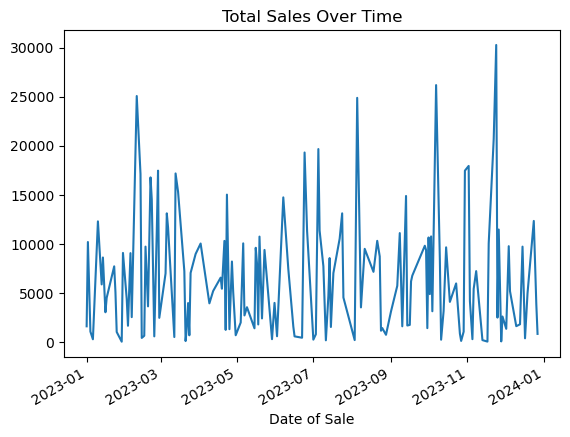

In [147]:
total_sales_over_time = data.groupby('Date of Sale')['Sales'].sum()
total_sales_over_time.plot(title="Total Sales Over Time")

3. Determine which month has the highest sales overall.

In [39]:
month_of_highest_sale = data.groupby('month')['Sales'].max().idxmax() # idxmax() look over the column and give us the highest value of the column
month_of_highest_sale

8

# 4. Aggregation and Grouping

1. What is the average sales amount for products sold with and without a promotion?

In [169]:
data.groupby('Promotion Applied')['Sales'].mean()

Promotion Applied
False    4694.249412
True     5287.173565
Name: Sales, dtype: float64

2. Group by region and product category, then find the total sales and average quantity.

In [172]:
data.groupby(['Region', 'Product Category']).agg({'Sales': 'sum', 'Quantity': 'mean'})

Sales   Quantity
Region Product Category                     
East   Clothing          32017.97   5.777778
       Electronics       60409.24   9.500000
       Furniture         49173.05  10.400000
       Grocery           46034.80  13.800000
       Toys              11519.37   4.333333
North  Clothing          52182.76   8.000000
       Electronics       25496.22  14.333333
       Furniture         40130.10   9.400000
       Grocery           38095.13   9.125000
       Toys              89493.97  11.416667
South  Clothing          35742.33   6.833333
       Electronics       43852.30   8.416667
       Furniture          8191.47   6.600000
       Grocery           61470.08  12.100000
       Toys              40512.63  10.307692
West   Clothing          77730.83  10.642857
       Electronics       80722.04   9.333333
       Furniture         63041.61   9.727273
       Grocery           87727.83  12.727273
       Toys              63492.43   9.300000

3. What are the top 3 regions in terms of total sales for each product category?

In [55]:
data.groupby(['Product Category', 'Region'])['Sales'].sum().sort_values(ascending=False).groupby(level=0).head(3)

Product Category  Region
Toys              North     89493.97
Grocery           West      87727.83
Electronics       West      80722.04
Clothing          West      77730.83
Toys              West      63492.43
Furniture         West      63041.61
Grocery           South     61470.08
Electronics       East      60409.24
Clothing          North     52182.76
Furniture         East      49173.05
Grocery           East      46034.80
Electronics       South     43852.30
Toys              South     40512.63
Furniture         North     40130.10
Clothing          South     35742.33
Name: Sales, dtype: float64

# 5. Text Analysis (Customer Feedback)

1. Find the most common phrases or words in customer feedback.

In [106]:
data['Customer Feedback'].value_counts()

Customer Feedback
Highly recommend     27
Worth the price      26
Could be better      22
Poor quality         21
Not satisfied        20
Not as expected      20
Excellent quality    18
Value for money      16
Fast delivery        15
Will buy again       15
Name: count, dtype: int64

2. Calculate the percentage of "Highly recommend" feedback by region.

In [144]:
highly_recommend = (data[data['Customer Feedback'] == 'Highly recommend'].groupby('Region').size()/data.groupby('Region').size() ) * 100
highly_recommend

Region
East     13.043478
North    14.634146
South    11.538462
West     14.754098
dtype: float64

3. Identify any products with predominantly negative feedback (e.g., "Not satisfied," "Could be better").

In [161]:
negative_feedback = data[data['Customer Feedback'].isin(["Not satisfied", 'Could be better', 'Not as expected', 'Poor quality'])]
negative_feedback_count = negative_feedback.groupby('Product Category').size()
print(negative_feedback_count)

Product Category
Clothing       18
Electronics    24
Furniture      15
Grocery         9
Toys           17
dtype: int64


# 6. Comparative Analysis

1. Compare the average sales with and without promotion across product categories.

In [171]:
data.groupby(['Product Category', 'Promotion Applied'])['Sales'].mean()

Product Category  Promotion Applied
Clothing          False                4139.996154
                  True                 4795.131333
Electronics       False                4346.961905
                  True                 4767.744000
Furniture         False                4691.358125
                  True                 4273.725000
Grocery           False                5899.012857
                  True                 7537.083000
Toys              False                4583.673333
                  True                 5438.063000
Name: Sales, dtype: float64

2. Are there any notable differences in the average sales between regions?

In [180]:
data.groupby('Region')['Sales'].mean()

Region
East     4329.444130
North    5985.321463
South    3649.400192
West     6110.077705
Name: Sales, dtype: float64

# 7. Boolean Analysis

1. What percentage of sales involved a promotion?

In [238]:
promotion_sales_percentage = (data.groupby('Promotion Applied')['Sales'].sum()/ data['Sales'].sum()) * 100
promotion_sales_percentage[True]

60.37766906006633

2. Determine the average sales increase or decrease when a promotion is applied.

In [240]:
total_sale = data.groupby('Promotion Applied')['Sales'].mean()
sale_diff = total_sale[True] - total_sale[False]
sale_diff

592.9241534526855

# 8. Advanced Calculations

1. Calculate the profit assuming a 20% profit margin on the sales amount.

In [252]:
data['Profit'] = data['Sales'] * 0.2

2. Create a new column "Discounted Price" with a 10% discount on products sold with a promotion.

In [323]:
data['Discounted_Price'] = data['Price'] - data['Price'] * np.where(data['Promotion Applied'] == True, 0.1, 0)
data

,Date of Sale,Product Category,Region,Price,Quantity,Sales,Customer Feedback,Promotion Applied,month,Profit,Discounted_Price
0,2023-11-24,Toys,West,380.79,11,4188.69,Value for money,True,11,837.738,342.711
1,2023-02-27,Clothing,North,951.21,17,16170.57,Worth the price,True,2,3234.114,856.089
2,2023-01-13,Grocery,North,734.67,8,5877.36,Value for money,True,1,1175.472,661.203
3,2023-05-21,Toys,North,602.67,4,2410.68,Excellent quality,True,5,482.136,542.403
4,2023-05-06,Toys,South,164.46,6,986.76,Highly recommend,False,5,197.352,164.460
...,...,...,...,...,...,...,...,...,...,...,...
195,2023-09-30,Grocery,North,355.72,4,1422.88,Excellent quality,True,9,284.576,320.148
196,2023-03-06,Clothing,West,728.70,18,13116.60,Value for money,True,3,2623.320,655.830
197,2023-03-07,Grocery,North,898.14,13,11675.82,Value for money,True,3,2335.164,808.326
198,2023-12-04,Clothing,North,888.22,11,9770.42,Not as expected,False,12,1954.084,888.220


3. Calculate the cumulative sales over time to analyze growth.

In [335]:
data = data.sort_values('Date of Sale')
cumulative_sales = data['Sales'].cumsum()
print(cumulative_sales)

179       1607.65
162      11802.69
31       12875.61
149      13161.47
183      25461.45
          ...    
95      989965.23
33     1002307.43
24     1003691.96
81     1006200.24
61     1007036.16
Name: Sales, Length: 200, dtype: float64


# 9. Visualizations (using Matplotlib or Seaborn)

1. Plot total sales by region and product category.

In [342]:
import matplotlib as plt

<Axes: title={'center': 'total sales by region and product category'}, xlabel='Region,Product Category'>

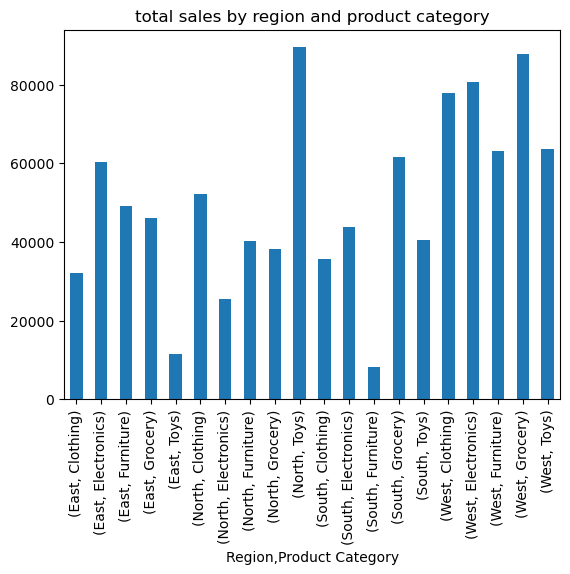

In [348]:
region_category_sales = data.groupby(['Region', 'Product Category'])['Sales'].sum()
region_category_sales.plot(kind='bar', title='total sales by region and product category')

2. Create a time-series plot showing monthly sales trends.

<Axes: title={'center': 'time-series plot showing monthly sales trends'}, xlabel='month'>

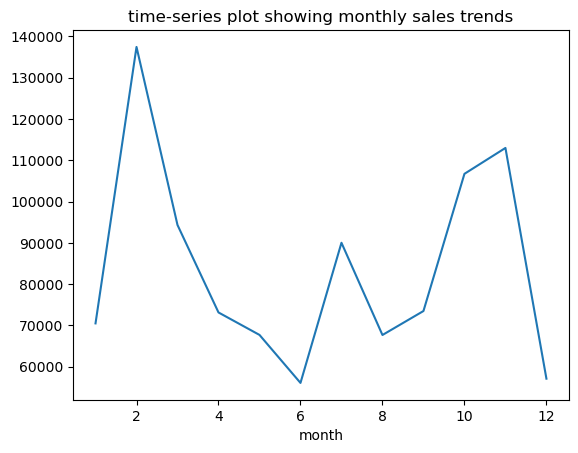

In [357]:
monthly_sales = data.groupby('month')['Sales'].sum()
monthly_sales.plot(title='time-series plot showing monthly sales trends')

3. Visualize the distribution of product prices and sales to identify any outliers.

<Axes: title={'center': 'Sales distribution'}, ylabel='Frequency'>

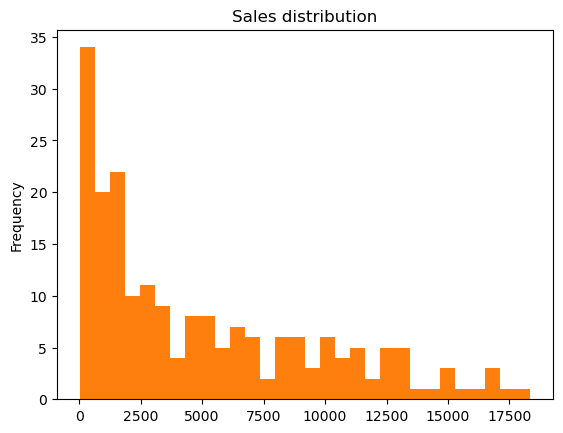

In [384]:
data['Price'].plot(kind='hist', bins=30, title='Price distribution')
data['Sales'].plot(kind='hist', bins=30, title='Sales distribution')